In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
exercise=pd.read_csv("exercise.csv")
calories=pd.read_csv("calories.csv")

In [3]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
df=pd.merge(exercise,calories, on='User_ID', how='inner')

In [6]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

# missing values

In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# duplicates

In [9]:
df.duplicated().sum()

0

# Univariate Analysis

In [10]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: xlabel='Gender'>

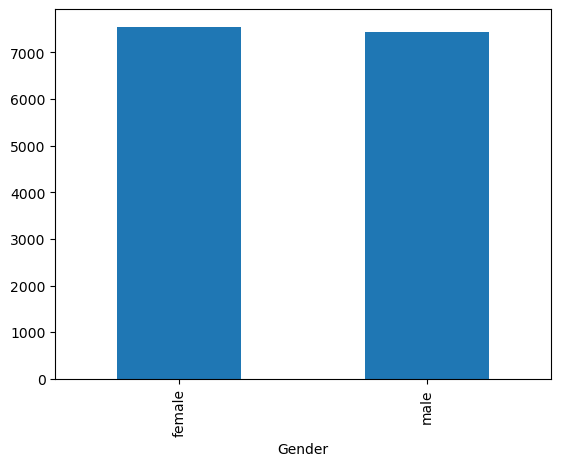

In [11]:
df["Gender"].value_counts().plot(kind="bar")

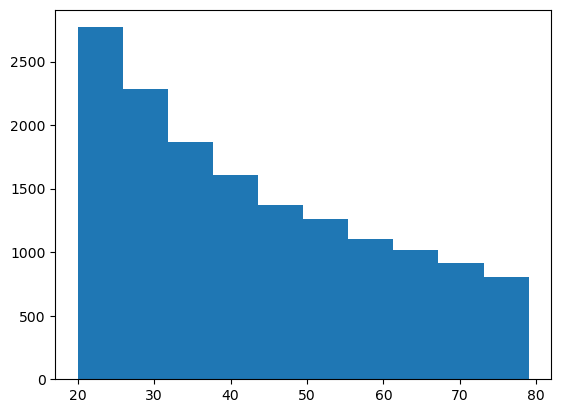

In [12]:
df["Age"].hist()
plt.grid(False)
plt.show()

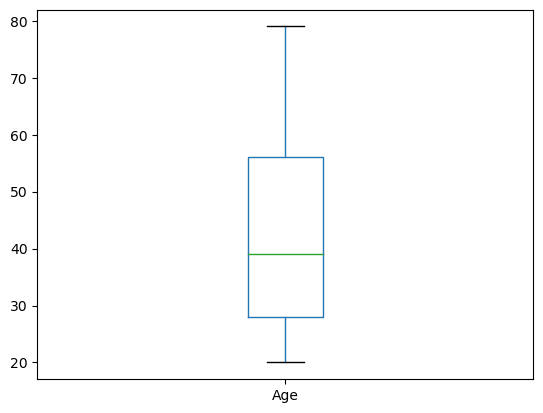

In [13]:
df.boxplot(column='Age')
plt.grid(False)

plt.show()

In [14]:
numerical_cols = df.select_dtypes(include=['float'])


<Figure size 1000x600 with 0 Axes>

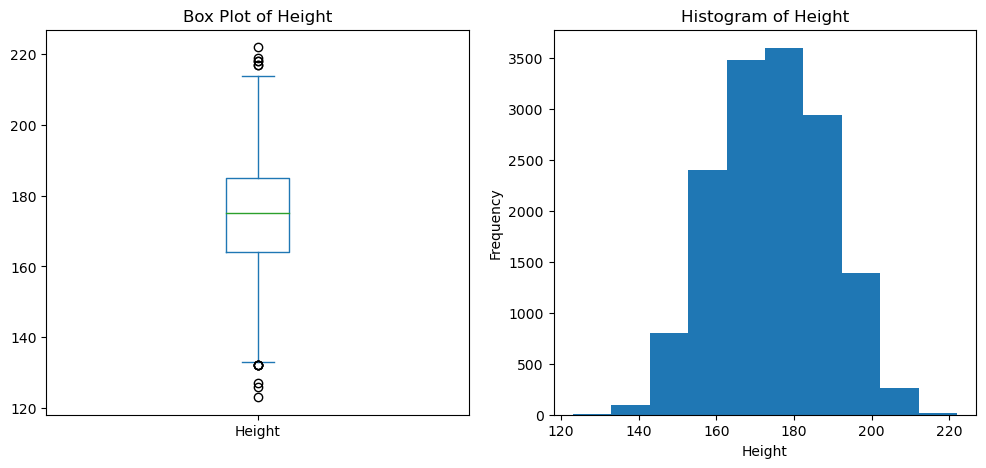

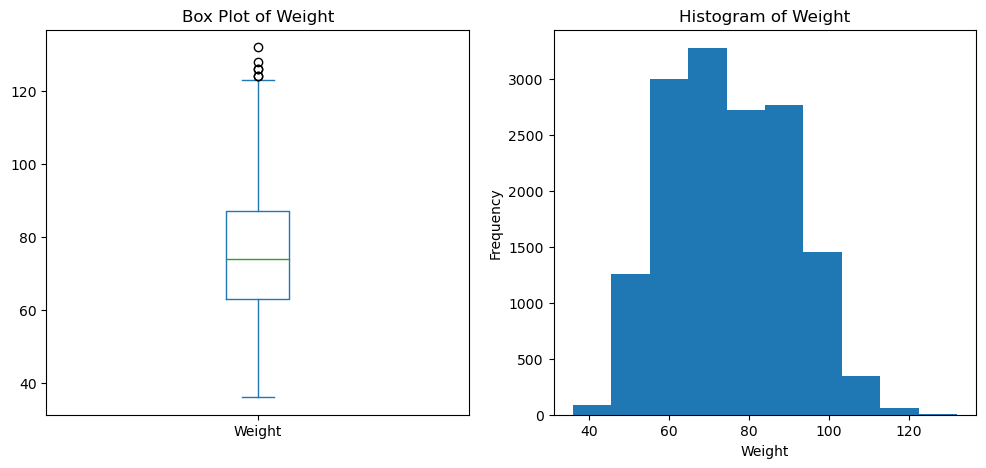

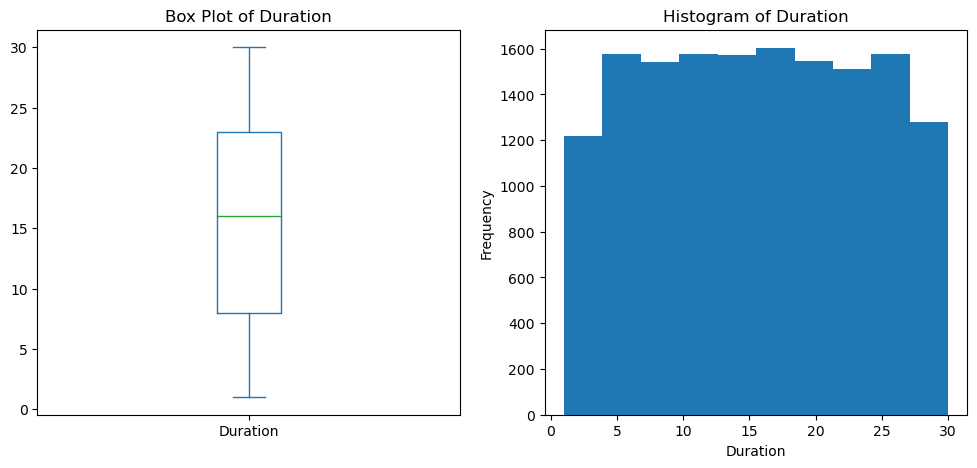

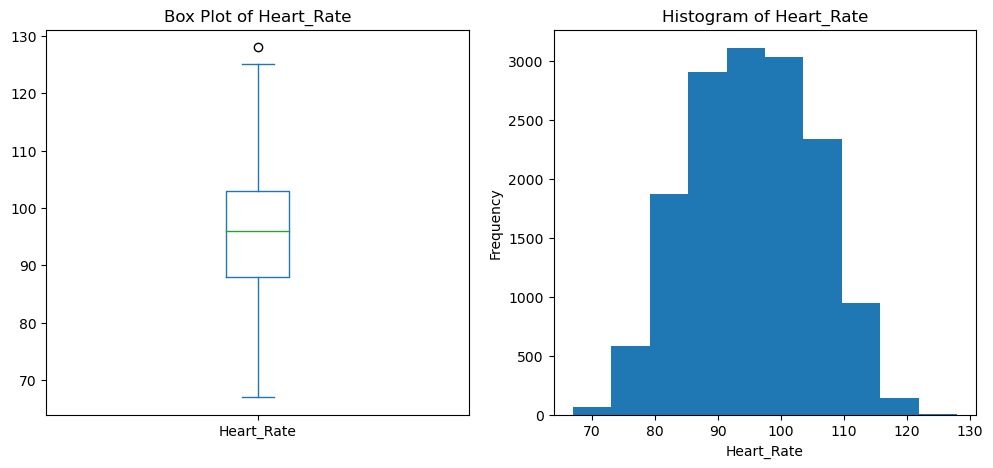

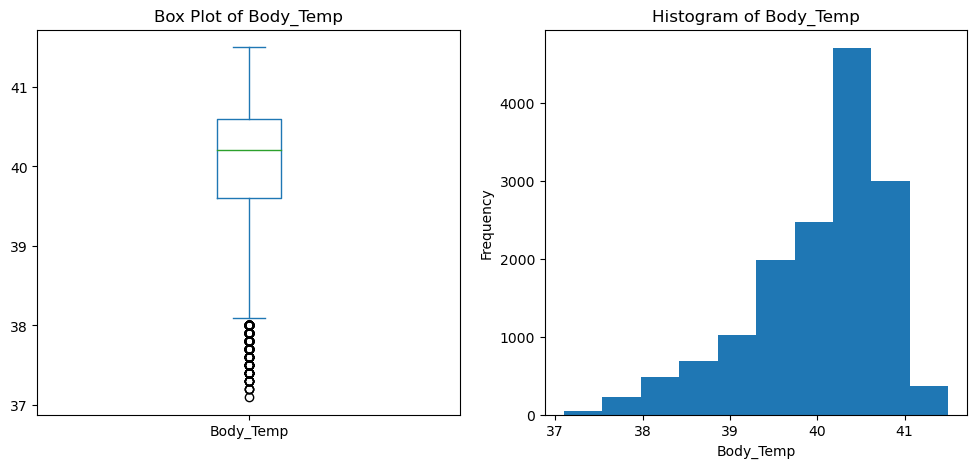

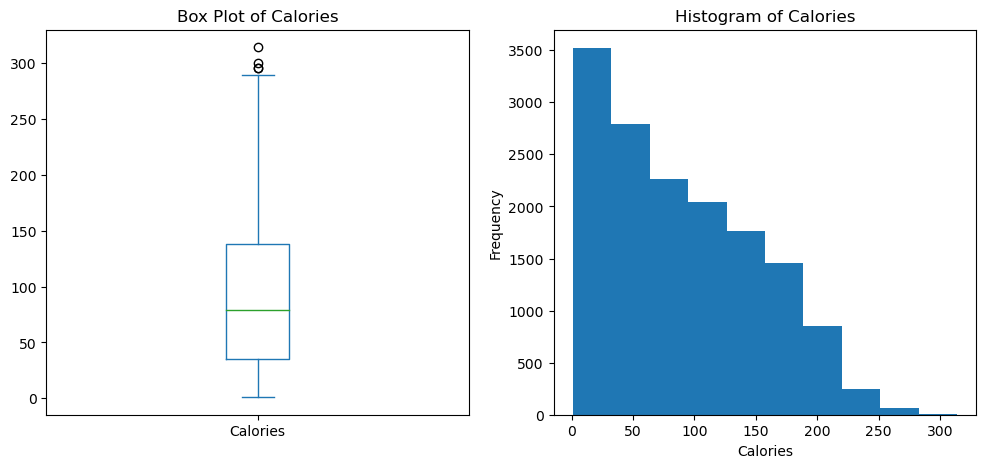

In [15]:
plt.figure(figsize=(10,6))
for col in numerical_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Box plot
    df[col].plot(kind='box', ax=axes[0])
    axes[0].set_title(f'Box Plot of {col}')
    axes[0].grid(False) 

    # Histogram
    df[col].plot(kind='hist', ax=axes[1])
    axes[1].set_title(f'Histogram of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')
    axes[1].grid(False)  
    

# bivariate and multivariate analysis

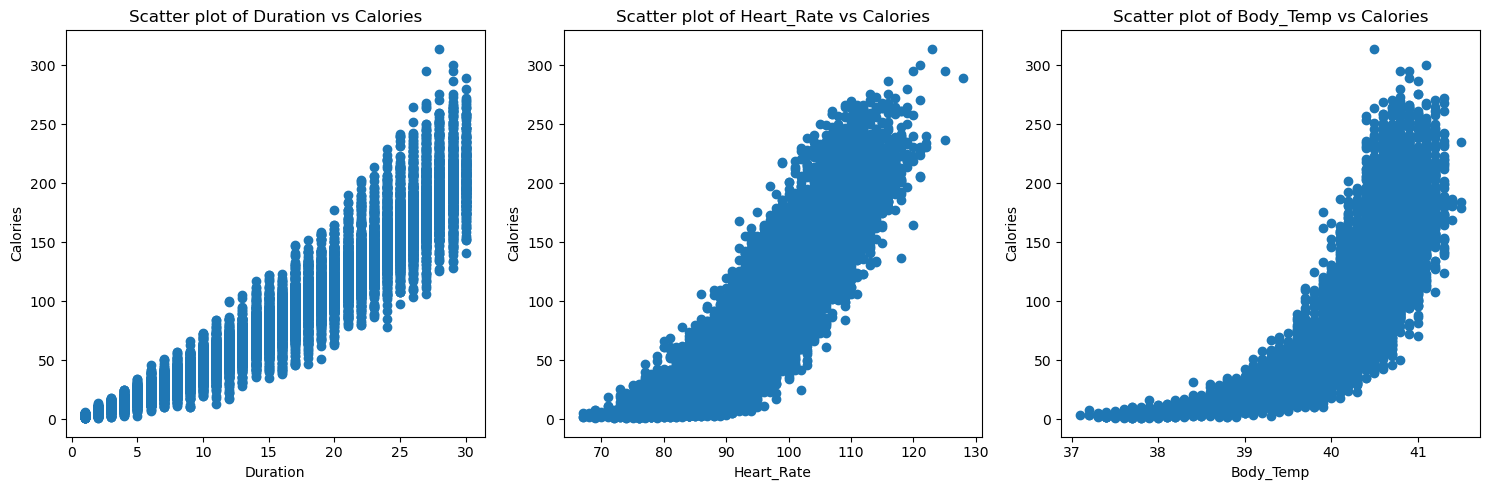

In [16]:
req=['Duration','Heart_Rate','Body_Temp']
plt.figure(figsize=(15, 5))
for i, col in enumerate(req):    
    plt.subplot(1, 3, i + 1)    
    plt.scatter(df[col], df['Calories'])    
    plt.title(f'Scatter plot of {col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')   
    plt.grid(False)


plt.tight_layout()
plt.show()  

In [17]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

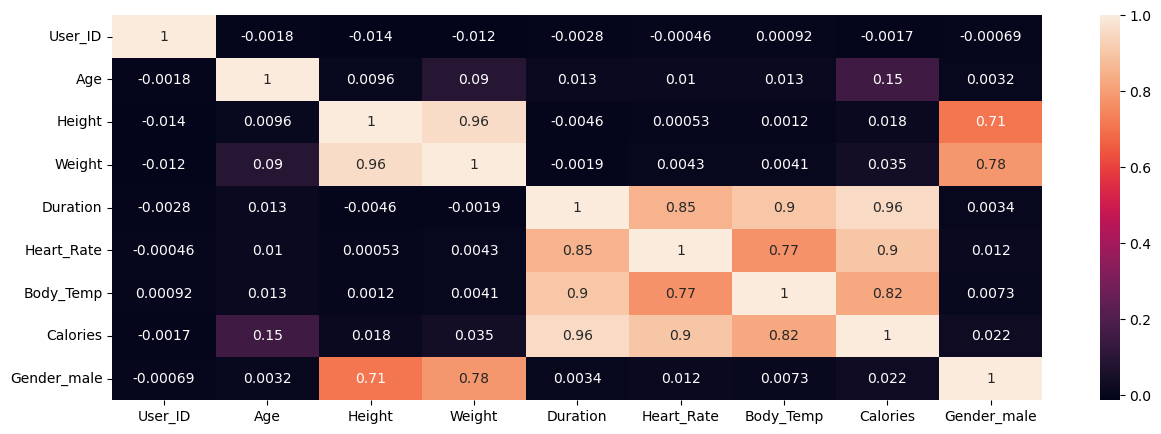

In [18]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Preprocessing and train test split

In [19]:
df=df.drop(columns=["User_ID"])

In [20]:
df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,True
1,20,166.0,60.0,14.0,94.0,40.3,66.0,False
2,69,179.0,79.0,5.0,88.0,38.7,26.0,True
3,34,179.0,71.0,13.0,100.0,40.5,71.0,False
4,27,154.0,58.0,10.0,81.0,39.8,35.0,False


In [21]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [22]:
X=df.drop(columns=["Calories"])
y=df["Calories"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Model1:Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred1=model1.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred1)

In [27]:
mse

132.74147553829349

### training accuracy

In [28]:
model1.score(X_train,y_train)

0.9674358698679194

### test accuracy

In [29]:
model1.score(X_test,y_test)

0.9664885791583727

### so the model is not overfitting or under  fitting but there is the high mse value 

# Model2:Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred2)

In [32]:
mse

7.797816853333335

### training accuracy

In [33]:
model2.score(X_train,y_train)

0.9996836137889145

### test accuracy

In [34]:
model2.score(X_test,y_test)

0.9980313920637216

# -------------------------------------------------------------------------------------------------------

In [37]:
import pickle
pickle_out=open("calories.pkl","wb")
pickle.dump(model1,pickle_out)
